### 1.1 Import packages for data cleaning & visualization

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("white")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [35]:
med = pd.read_pickle("med.pkl")

In [36]:
med.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,No_Show,Day_Of_Week,Waiting_Days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,Jardim Da Penha,0,1,0,0,0,0,No,Friday,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,Jardim Da Penha,0,0,0,0,0,0,No,Friday,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,Mata Da Praia,0,0,0,0,0,0,No,Friday,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,Pontal De Camburi,0,0,0,0,0,0,No,Friday,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,Jardim Da Penha,0,1,1,0,0,0,No,Friday,0


In [37]:
weather_list = [['1', '24.8', '32', '20', '1013.6', '77', '0', '15.8', '7.4', '20.6', '37', '\xa0', '\xa0', 'o', '\xa0'],
['2', '25.2', '30', '21.5', '1012.5', '80', '0.25', '15.3', '9.1', '16.5', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['3', '24.9', '27.1', '23', '1012.7', '78', '0', '13.7', '9.8', '20.6', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['4', '25.2', '29', '22.7', '1012.8', '86', '0', '14.3', '8.3', '25.9', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['5', '25.9', '31', '22', '1013.5', '80', '0', '13.8', '11.7', '25.9', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['6', '26.8', '34', '24', '1011.7', '79', '0', '14.3', '14.6', '31.7', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['7', '24.7', '27', '23', '1011.8', '85', '0', '13', '14.6', '29.4', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['8', '23.4', '25.5', '22', '1016.5', '78', '0', '13.4', '17.6', '25.9', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['9', '20.6', '22', '19', '1019.4', '81', '5.08', '12.1', '15.4', '24.1', '-', 'o', '\xa0', '\xa0', '\xa0'],
['10', '21.4', '24', '19.8', '1020.3', '68', '0', '13.4', '9.6', '16.5', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['11', '21', '23.2', '20', '1019.7', '72', '0.25', '12.2', '15.7', '29.4', '-', 'o', '\xa0', '\xa0', '\xa0'],
['12', '19.9', '21', '18', '1023.7', '66', '0.51', '12.7', '12.6', '16.5', '-', 'o', '\xa0', '\xa0', '\xa0'],
['13', '20', '22.2', '18', '1026.6', '61', '0', '14.6', '21.5', '33.5', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['14', '21.1', '25.1', '17.7', '1027.7', '62', '0', '14.6', '18', '25.9', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['15', '19', '25', '13', '1026.1', '75', '0', '15.3', '9.6', '24.1', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['16', '19.6', '25', '15', '1024', '74', '0', '15.3', '9.8', '22.2', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['17', '20.4', '27', '14.8', '1021.9', '73', '0', '16.7', '9.1', '20.6', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['18', '20.6', '29', '13.5', '1020.4', '71', '0', '18.7', '8.3', '24.1', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['19', '20', '24.5', '15', '1022', '86', '0', '13.5', '8.7', '24.1', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['20', '21.7', '25', '18.7', '1021.3', '87', '0', '11.4', '8', '22.2', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['21', '21.8', '24', '19.7', '1022.9', '83', '6.1', '10.5', '14.3', '27.8', '-', 'o', '\xa0', '\xa0', '\xa0'],
['22', '20.4', '22', '19', '1023.6', '92', '16', '8', '11.7', '20.6', '33.5', 'o', '\xa0', '\xa0', '\xa0'],
['23', '21.9', '28', '17.7', '1020.5', '84', '8.89', '15', '6.1', '16.5', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['24', '22.1', '25', '19', '1021.9', '83', '0', '13.2', '15', '22.2', '-', '\xa0', '\xa0', '\xa0', '\xa0'],
['25', '21.1', '23.2', '19.7', '1025', '85', '0.51', '12.1', '14.1', '22.2', '-', 'o', '\xa0', '\xa0', '\xa0'],
['26', '19.9', '23', '15.8', '1026.2', '88', '6.1', '11.4', '8.7', '20.6', '-', 'o', '\xa0', '\xa0', '\xa0'],
['27', '19.8', '22', '18', '1026.3', '95', '5.08', '8.9', '8.1', '20.6', '-', 'o', '\xa0', '\xa0', '\xa0'],
['28', '21.8', '25', '19.5', '1025.8', '85', '8.89', '10.1', '8', '13', '-', 'o', '\xa0', '\xa0', '\xa0'],
['29', '20.4', '24.2', '17.5', '1024.6', '92', '0', '11.3', '5.2', '16.5', '-', 'o', '\xa0', '\xa0', '\xa0'],
['30', '22.4', '25.5', '20', '1023.9', '90', '2.29', '12.9', '7', '18.3', '-', '\xa0', '\xa0', '\xa0', '\xa0']]

weather = pd.DataFrame(columns=['Day', 'T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG', 'RA', 'SN', 'TS', 'FG'], data=weather_list)

In [43]:
weather.head()

,Day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG
0,1,24.8,32,20,1013.6,77,0,15.8,7.4,20.6,37,,,o,
1,2,25.2,30,21.5,1012.5,80,0.25,15.3,9.1,16.5,-,,,,
2,3,24.9,27.1,23,1012.7,78,0,13.7,9.8,20.6,-,,,,
3,4,25.2,29,22.7,1012.8,86,0,14.3,8.3,25.9,-,,,,
4,5,25.9,31,22,1013.5,80,0,13.8,11.7,25.9,-,,,,


In [38]:
weather.dtypes

Day    object
T      object
TM     object
Tm     object
SLP    object
H      object
PP     object
VV     object
V      object
VM     object
VG     object
RA     object
SN     object
TS     object
FG     object
dtype: object

In [64]:
weather.drop(['VG', 'RA', 'SN', 'TS', 'FG'], axis=1, inplace=True)

In [65]:
weather.isnull().sum(axis = 0)

Day    0
T      0
TM     0
Tm     0
SLP    0
H      0
PP     0
VV     0
V      0
VM     0
dtype: int64

In [66]:
weather[['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM']] = weather[['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM']].apply(pd.to_numeric)

In [67]:
weather.dtypes

Day      int32
T      float64
TM     float64
Tm     float64
SLP    float64
H        int64
PP     float64
VV     float64
V      float64
VM     float64
dtype: object

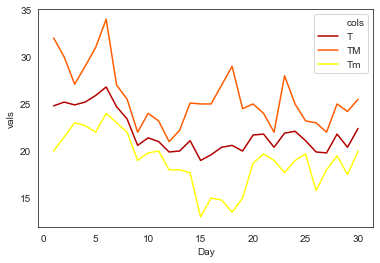

In [84]:
#sns.lineplot(x='Day', y=[['T','TM','Tm']], data=weather, palette="hot", linewidth=2.5);

temp = weather[['Day','T','TM','Tm']].melt('Day', var_name='cols',  value_name='vals')
temp_plot = sns.lineplot(x="Day", y="vals", hue='cols', data=temp, palette="hot")

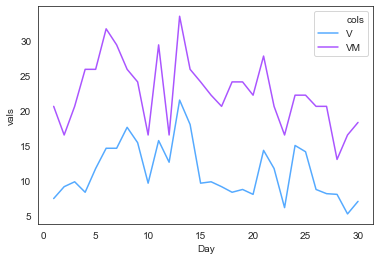

In [85]:
wind = weather[['Day','V','VM']].melt('Day', var_name='cols',  value_name='vals')
wind_speed_plot = sns.lineplot(x="Day", y="vals", hue='cols', data=wind, palette="cool")

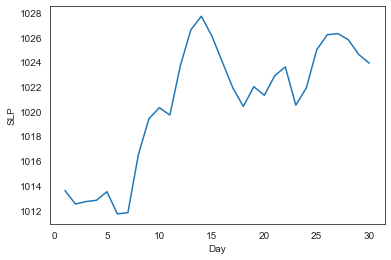

In [88]:
pressure_plot = sns.lineplot(x="Day", y="SLP", data=weather, palette="purple")

*T	Temperatura media (ºC.)
*TM	Temperatura máxima media (ºC.)
*Tm	Temperatura mínima media (ºC.)
SLP	Presión atmosférica a nivel del mar (mb)
*H	Humedad relativa media (%)
*PP	Precipitación total de lluvia y/o nieve derretida (mm)
VV	Visibilidad media (Km)
*V	Velocidad media del viento (Km/h)
*VM	Velocidad máxima sostenida del viento (Km/h)